In [1]:
import pandas as pd
import numpy as np
import os
from rich import print

try:
    __SETUP
except:
    # if we are in the notebooks folder, go up one level
    path = os.getcwd()
    if path.endswith("solutions"):
        os.chdir("..")
    __SETUP = 1

print(os.getcwd())

/Users/andre/ergodic/tutai

# The HR problem

The pandemic is over and luckily you landed an amazing job at LargeCo to be a senior data scientist in the HR department. Now it's your job to look into candidates and employees records to make leadership confident that they're doing the right thing and upscaling people.

When looking at a predictive model, the previous data scientist found that soft skills seemed to be negatively impacting technical skills and vice-versa. So they stopped training salespeople on data to avoid deteriorating their soft skills! DATA-DRIVEN DECISION MAKING!

What do you have to say about that?


In [2]:
df = pd.read_csv("data/soft_skills.csv", index_col=0)

In [3]:
factors = ["Employee", "Technical Skills", "Education"]

y = df["Soft Skills"]
X = df[factors]

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print({factors[i]: model.coef_[i] for i in range(len(factors))})

{
    'Employee': np.float64(0.46139294529913943),
    'Technical Skills': np.float64(-0.3731557314221549),
    'Education': np.float64(0.0646957640670501)
}

# Colliders!


A collider is a variable that is caused by two or more other variables. Think of it like a funnel where multiple things flow into it.

The tricky part is that when you condition on (or control for) a collider, you accidentally create a fake relationship between its causes - even if they were completely independent before!

It's like when you're looking at ER admissions data and concluded that people who broke their leg are less likely to get the flu! It's just the fact that most people who go to the ER are there because of an accident or because of an infectious disase.

In our HR example, if "Employee" status is a collider (meaning people get hired based on either technical skills OR soft skills), then looking only at current employees might make it seem like technical and soft skills are negatively related, when they're actually independent (or positively related) in the general population.


# The solution is simple: throw away the colliders!


In [5]:
from sklearn.linear_model import LinearRegression

factors = ["Technical Skills", "Education"]

y = df["Soft Skills"]
X = df[factors]
model = LinearRegression()
model.fit(X, y)

print({factors[i]: model.coef_[i] for i in range(len(factors))})

{'Technical Skills': np.float64(0.0009872073356389077), 'Education': np.float64(0.10817505720175054)}

<Axes: xlabel='Soft Skills', ylabel='Technical Skills'>

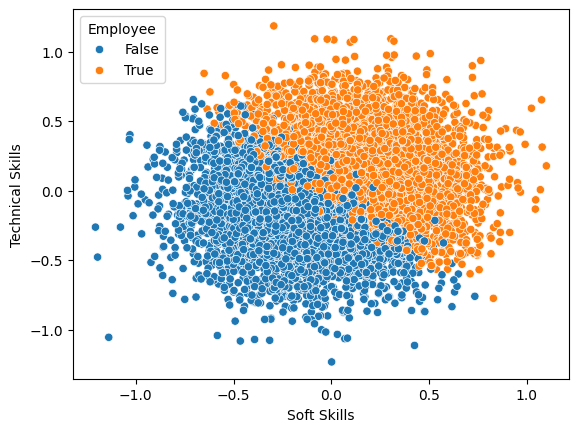

In [7]:
import seaborn as sns

sns.scatterplot(
    df,
    x="Soft Skills",
    y="Technical Skills",
    hue="Employee",
)
### Conclusion